## **popularity prediction(for non published songs)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 **Imports**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV

from xgboost import XGBRFRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR

**Dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/ML/song popularity and streams prediction/spotify_dataset.csv')  
data.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


**preprocessing**

In [ ]:

data=data.drop(['Index','Highest Charting Position','Number of Times Charted','Week of Highest Charting',
                'Song Name','Streams','Song ID','Weeks Charted'],axis=1)
data.head()

,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,Måneskin,3377762,"['indie rock italiano', 'italian pop']",2017-12-08,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,The Kid LAROI,2230022,['australian hip hop'],2021-07-09,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,Olivia Rodrigo,6266514,['pop'],2021-05-21,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,Ed Sheeran,83293380,"['pop', 'uk pop']",2021-06-25,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,Lil Nas X,5473565,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [ ]:
data.dtypes

Artist              object
Artist Followers    object
Genre               object
Release Date        object
Popularity          object
Danceability        object
Energy              object
Loudness            object
Speechiness         object
Acousticness        object
Liveness            object
Tempo               object
Duration (ms)       object
Valence             object
Chord               object
dtype: object

convert object to numeric

In [ ]:
data['Artist Followers']=pd.to_numeric(data['Artist Followers'],errors='coerce')
data['Popularity']=pd.to_numeric(data['Popularity'],errors='coerce')
data['Danceability']=pd.to_numeric(data['Danceability'],errors='coerce')
data['Energy']=pd.to_numeric(data['Energy'],errors='coerce')
data['Loudness']=pd.to_numeric(data['Loudness'],errors='coerce')
data['Speechiness']=pd.to_numeric(data['Speechiness'],errors='coerce')
data['Acousticness']=pd.to_numeric(data['Acousticness'],errors='coerce')
data['Liveness']=pd.to_numeric(data['Liveness'],errors='coerce')
data['Tempo']=pd.to_numeric(data['Tempo'],errors='coerce')
data['Duration (ms)']=pd.to_numeric(data['Duration (ms)'],errors='coerce')
data['Valence']=pd.to_numeric(data['Valence'],errors='coerce')

In [ ]:
data.dtypes

Artist               object
Artist Followers    float64
Genre                object
Release Date         object
Popularity          float64
Danceability        float64
Energy              float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Liveness            float64
Tempo               float64
Duration (ms)       float64
Valence             float64
Chord                object
dtype: object

In [ ]:
data.isnull().sum()

Artist               0
Artist Followers    11
Genre                0
Release Date         0
Popularity          11
Danceability        11
Energy              11
Loudness            11
Speechiness         11
Acousticness        11
Liveness            11
Tempo               11
Duration (ms)       11
Valence             11
Chord                0
dtype: int64

Drop the null value

In [ ]:
data=data.dropna()
data.isnull().sum()

Artist              0
Artist Followers    0
Genre               0
Release Date        0
Popularity          0
Danceability        0
Energy              0
Loudness            0
Speechiness         0
Acousticness        0
Liveness            0
Tempo               0
Duration (ms)       0
Valence             0
Chord               0
dtype: int64

extracting month from datae

In [ ]:
data['Release Date']=pd.to_datetime(data['Release Date'],infer_datetime_format=True,errors='coerce')
data['month']=data['Release Date'].dt.month

data=data.drop('Release Date',axis=1)
data.head(2)

,Artist,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,month
0,Måneskin,3377762.0,"['indie rock italiano', 'italian pop']",100.0,0.714,0.800,-4.808,0.0504,0.1270,0.359,134.002,211560.0,0.589,B,12
1,The Kid LAROI,2230022.0,['australian hip hop'],99.0,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806.0,0.478,C#/Db,7


Label encoding

In [ ]:
le_Artist =LabelEncoder()
le_Genre =LabelEncoder()
le_Chord =LabelEncoder()

    
data['Artist'] =le_Artist.fit_transform(data['Artist'])
data['Genre'] =le_Genre.fit_transform(data['Genre'])  
data['Chord'] =le_Chord.fit_transform(data['Chord'])

data.head(2)

,Artist,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,month
0,469,3377762.0,276,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.359,134.002,211560.0,0.589,2,12
1,643,2230022.0,63,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806.0,0.478,4,7


In [ ]:
data.shape

(1545, 15)

**X, Y split**

In [ ]:
x=data.drop('Popularity',axis=1)
y=data['Popularity']

**Scaling** 

In [ ]:
scaler =MinMaxScaler()
x=scaler.fit_transform(x)

**visualization**

<Axes: title={'center': 'Top in Loudness'}, xlabel='Popularity', ylabel='Loudness'>

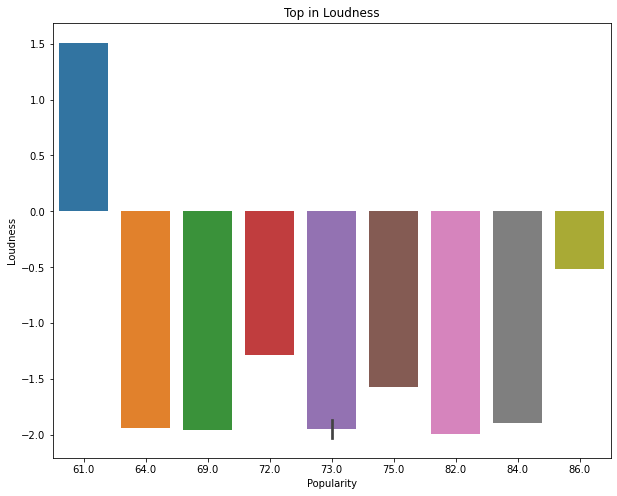

In [ ]:
sort=data.sort_values(by=['Loudness'],ascending=False)
plt.figure(figsize=[10,8])
plt.title('Top in Loudness')
sns.barplot(x='Popularity',y='Loudness',data=sort.head(10))

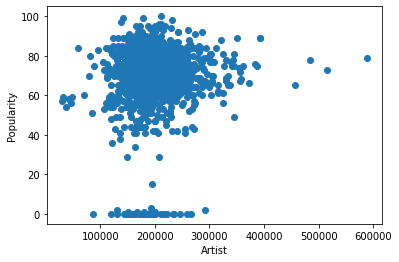

In [ ]:
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.scatter(data['Duration (ms)'],data['Popularity'])

**Correlation**

<Axes: >

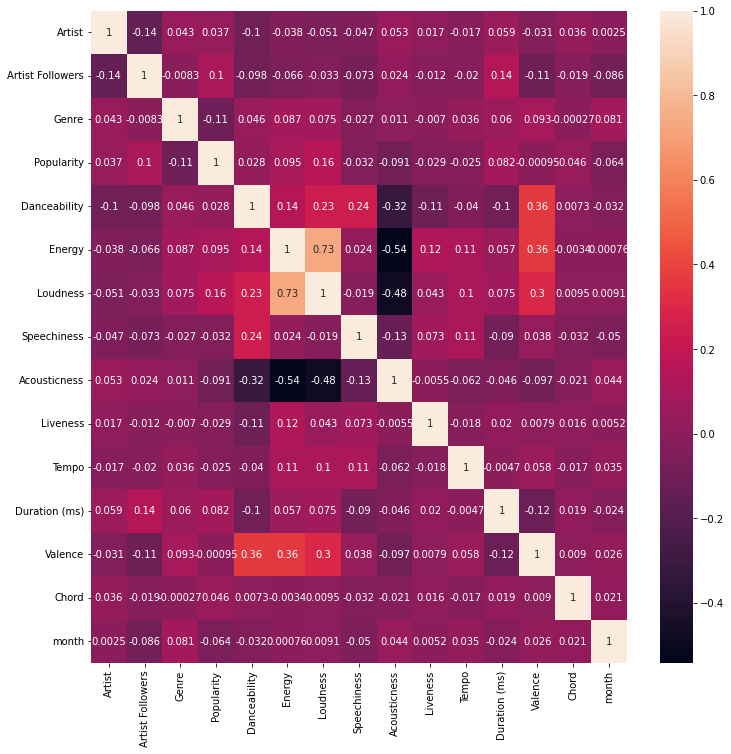

In [ ]:
c=data.corr()
plt.figure(figsize=[12,12])
sns.heatmap(c,annot=True)

In [ ]:
print(data['Artist'].corr(data['Popularity']))
print(data['Artist Followers'].corr(data['Popularity']))
print(data['Genre'].corr(data['Popularity']))
print(data['Danceability'].corr(data['Popularity']))

print('**************')
print(data['Energy'].corr(data['Popularity']))
print(data['Loudness'].corr(data['Popularity']))
print(data['Speechiness'].corr(data['Popularity']))
print(data['Acousticness'].corr(data['Popularity']))

print('**************')
print(data['Liveness'].corr(data['Popularity']))
print(data['Tempo'].corr(data['Popularity']))
print(data['Duration (ms)'].corr(data['Popularity']))
print(data['Valence'].corr(data['Popularity']))

print('**************')
print(data['Chord'].corr(data['Popularity']))
print(data['month'].corr(data['Popularity']))



0.03732347786491109
0.1043577212316507
-0.1075888717018958
0.02843469181752918
**************
0.09469051758444463
0.15876746803181324
-0.03209063359152795
-0.09124461072497646
**************
-0.029459634726915384
-0.02495087653404513
0.08209572542261853
-0.0009533924114401778
**************
0.045787615126558615
-0.06380392190329007


**feature selection based on correlation**

0.00

In [ ]:
data=data.drop(['Valence'],axis=1)

< 0.04

In [ ]:
data=data.drop(['Artist','Danceability','Speechiness','Liveness','Tempo'],axis=1)

< 0.5

In [ ]:
data=data.drop(['Chord'],axis=1)

In [ ]:
# data.drop(['month'],axis=1)
#data.head(2)

**Hyperparameter turning**

In [ ]:
model_params={'AdaBoostRegressor':{'model':AdaBoostRegressor(),'params':{}},
              'GradientBoostingRegressor':{'model':GradientBoostingRegressor(),'params':{}},
              'XGBRFRegressor':{'model':XGBRFRegressor(),'params':{}}}

In [ ]:
scores = []
models = ['AdaBoostRegressor','GradientBoostingRegressor','XGBRFRegressor']
for model_name in models:
    mp=model_params[model_name]
    gds=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=True)
    gds.fit(x,y)
    scores.append({'model':model_name, 'best_score':gds.best_score_ , 'best_params':gds.best_params_})

In [ ]:
scores

[{'model': 'AdaBoostRegressor',
  'best_score': 0.3220864288351488,
  'best_params': {}},
 {'model': 'GradientBoostingRegressor',
  'best_score': 0.320357821755702,
  'best_params': {}},
 {'model': 'XGBRFRegressor',
  'best_score': 0.29811794196725805,
  'best_params': {}}]

other models

In [ ]:
model_params = {'DecisionTreeRegressor':{'model':DecisionTreeRegressor(),'params':{'max_depth':[1,2,3,4,5,6]}},
               'RandomForestRegressor':{'model':RandomForestRegressor(),'params':{'n_estimators':[5,10,15,20,22,24,25,30,],'max_depth':[1,2,3,4,5,6,7]}}}
                                                                             
                                                      
        

In [ ]:
scores = []
models = ['DecisionTreeRegressor','RandomForestRegressor']
for model_name in models:
    mp=model_params[model_name]
    gds=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=True)
    gds.fit(x,y)
    scores.append({'model':model_name, 'best_score':gds.best_score_ , 'best_params':gds.best_params_})

In [ ]:
scores

[{'model': 'DecisionTreeRegressor',
  'best_score': 0.3104885446848832,
  'best_params': {'max_depth': 2}},
 {'model': 'RandomForestRegressor',
  'best_score': 0.3263081710603851,
  'best_params': {'max_depth': 3, 'n_estimators': 30}}]

Other models

In [ ]:
model_params = {'svm':{'model':SVR(),'params':{'gamma':['auto','scale'],'C':[1,10,20],'kernel':['rbf','linear']}},
               'KNeighborsClassifier':{'model':KNeighborsRegressor(),'params':{'n_neighbors':[10,20,30]}},                
               'logistic_regression':{'model':LogisticRegression(),'params':{'C':[1,5,10]}}}

In [ ]:
# scores =[]
# models = ['svm','KNeighborsClassifier','logistic_regression']
# for model_name in models: #model_name ='svm'
#     mp=model_params[model_name]
#     gds=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=True)
#     gds.fit(x, y)
#     scores.append({'model':model_name, 'best_score':gds.best_score_ , 'best_params':gds.best_params_})



In [ ]:
scores

[{'model': 'svm',
  'best_score': -0.35963469423953637,
  'best_params': {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}},
 {'model': 'KNeighborsClassifier',
  'best_score': -0.2525062530742296,
  'best_params': {'n_neighbors': 20}},
 {'model': 'logistic_regression',
  'best_score': 0.05954692556634304,
  'best_params': {'C': 10}}]

**Train, Test split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=33)

**model**

In [ ]:
RF1=RandomForestRegressor(max_depth= 12, n_estimators= 30)
RF1_model=RF1.fit(x_train,y_train)
RF1_model.score(x_test,y_test)

0.7016754172232716

In [ ]:
GRDBOOST=GradientBoostingRegressor()
GRDBOOST_model=GRDBOOST.fit(x_train,y_train)
GRDBOOST_model.score(x_test,y_test)

0.6738966298184947

In [ ]:
XGBR=XGBRFRegressor()
xgb_model=XGBR.fit(x_train,y_train)
xgb_model.score(x_test,y_test)

0.6660900258385788

In [ ]:
RF=RandomForestRegressor()
RF_model=RF.fit(x_train,y_train)
RF_model.score(x_test,y_test)

0.7041110698455917

**prediction**

In [ ]:
RF1_model.predict([x_test[2]])

array([73.2609121])

**Saving the model**

In [ ]:
import joblib
joblib.dump(RF1_model,'pop2_model')

['pop2_model']

**Reloding**

In [ ]:
joblib_reload=joblib.load('/content/drive/MyDrive/Colab Notebooks/project/ML/song popularity and streams prediction/pop2_model')
joblib_reload.predict([x_test[2]])

array([73.2609121])

In [ ]:
x_test[0]

array([0.07310049, 0.92875318, 0.72707424, 0.77645736, 0.20722312,
       0.42492195, 0.18181818])

**Function for prediction**

In [ ]:
def prediction(values):
  joblib_reloaded=joblib.load('/content/drive/MyDrive/Colab Notebooks/project/ML/song popularity and streams prediction/pop2_model')
  result=joblib_reloaded.predict([values])
  result=result[0]
  print('The popularity of the song is {} % ' .format(result))

In [ ]:
values=0.07310049, 0.92875318, 0.72707424, 0.77645736, 0.20722312,0.42492195, 0.18181818
prediction(values)

The popularity of the song is 79.64635129997806 % 


**Function for predicting non-preprocessed data**

In [ ]:
def pred(Followers,	Genre, Energy, Loudness, Acousticness, Duration,	month):
  gener=le_Genre.transform([Genre])
  values=scaler.transform([[Followers,gener[0],Energy,Loudness,Acousticness,Duration,month]])
  joblib_reloaded=joblib.load('/content/drive/MyDrive/Colab Notebooks/project/ML/song popularity and streams prediction/pop2_model')
  result=joblib_reloaded.predict(values)
  result=result[0]
  print('The popularity of the song is {} % ' .format(result))

In [ ]:
pred(3377762.0, "['pop', 'uk pop']",0.8,-4.808, 0.127, 211560.0, 12)

The popularity of the song is 78.36327390411473 % 


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


dataset

In [ ]:
data.head()

,Artist Followers,Genre,Popularity,Energy,Loudness,Acousticness,Duration (ms),month
0,3377762.0,276,100.0,0.800,-4.808,0.1270,211560.0,12
1,2230022.0,63,99.0,0.764,-5.484,0.0383,141806.0,7
2,6266514.0,364,99.0,0.664,-5.044,0.3350,178147.0,5
3,83293380.0,363,98.0,0.897,-3.712,0.0469,231041.0,6
4,5473565.0,312,96.0,0.704,-7.409,0.0203,212000.0,7


In [ ]:
# gener=le_Genre.transform(["['pop', 'uk pop']"])
# values=scaler.transform([[5473565.0,gener[0],0.736,-7.409,0.0615,212000.0,5]])
# joblib_reloaded=joblib.load('/content/drive/MyDrive/Colab Notebooks/project/ML/song popularity and streams prediction/pop2_model')
# result=joblib_reloaded.predict(values)
# result=result[0]
# print('The popularity of the song is {} % ' .format(result))